# Notebook #2: Exploratory Data Analysis
Capstone Project\
ADS-599 Summer 2024\
Roger Qiu & Shailja Somani

This notebook begins with the clean, consolidated, & encoded dataset that results from the the notebook *1_Data_Preparation.ipynb*. Please run through that notebook prior to this one to obtain *prepped_dataset.csv*. We are unfortunately unable to upload that consolidated dataset to Github due to the file being too large. 

## Table of Contents
1. [Setup and Package Imports](#setup-and-package-imports)
2. [Load in Data](#load-in-data)
3. [Target Field Analysis](#target-field-analysis)
    1. [Univariate Non-Graphical Analysis](#univariate-non-graphical-analysis)
    2. [Univariate Graphical Analysis](#univariate-graphical-analysis)
    3. [Multivariate Non-Graphical and Graphical Analysis](#multivariate-non-graphical-and-graphical-analysis)
4. [Check distribution of other fields from feature table](#check-distribution-of-other-fields-from-feature-table)
5. [Check counties with high rates of select illnesses (target or features)](#check-counties-with-high-rates-of-select-illnesses-target-or-features)

## Setup and Package Imports

In [1]:
# import pandas to handle data
import pandas as pd

# import matplotlib for graphs and visualizations
import matplotlib.pyplot as plt

# import seaborn for Multivariate Graphical Analysis
import seaborn as sns

# set display options to show all columns of tables - comment out prior to printing as PDF
#pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## Load in Data

In [2]:
# read in the cleaned and consolidated dataset for EDA
#df = pd.read_csv('/Users/shailjasomani/Documents/USD_MS_ADS/ADS_599/Datasets/prepped_dataset.csv')
df = pd.read_csv('/Users/rogerqiu/Documents/usd/ADS-599-Capstone/Jupyter_Notebooks/prepped_dataset.csv')

df.head()

,location_name,TARGET_mortality_rate,ACS_TOT_POP_WT,ACS_TOT_POP_US_ABOVE1,ACS_TOT_POP_ABOVE5,ACS_TOT_POP_ABOVE15,ACS_TOT_POP_ABOVE16,ACS_TOT_POP_16_19,ACS_TOT_POP_ABOVE25,ACS_TOT_CIVIL_POP_ABOVE18,...,Sleep <7 hours,Stroke,Taking BP Medication,Vision Disability,race__API,race__Black,race__Latino,race__White,sex__Male,age_category
0,Autauga County (Alabama),0.0,55380.0,54699.0,52163.0,44749.0,43953.0,3016.0,37367.0,41725.0,...,40.040,3.680,79.660000,6.320000,0,0,1,0,0,0
1,Autauga County (Alabama),0.0,55380.0,54699.0,52163.0,44749.0,43953.0,3016.0,37367.0,41725.0,...,40.040,3.680,79.660000,6.320000,0,1,0,0,0,0
2,Autauga County (Alabama),0.0,55380.0,54699.0,52163.0,44749.0,43953.0,3016.0,37367.0,41725.0,...,40.040,3.680,79.660000,6.320000,0,0,0,1,0,0
3,Baldwin County (Alabama),0.0,212830.0,210908.0,201141.0,174821.0,172297.0,10307.0,151112.0,166417.0,...,34.975,3.625,81.445833,5.104167,0,0,1,0,0,0
4,Baldwin County (Alabama),0.0,212830.0,210908.0,201141.0,174821.0,172297.0,10307.0,151112.0,166417.0,...,34.975,3.625,81.445833,5.104167,0,1,0,0,0,0


In [3]:
# our consolidated dataset has 277,894 records and 356 fields
df.shape

(277894, 354)

## Target Field Analysis

In [4]:
# check nulls in our target field, 0 is good
df['TARGET_mortality_rate'].isnull().sum()

0

### Univariate Non-Graphical Analysis

In [5]:
# use describe to get statistical summary on our target field, targetues are all very small
df['TARGET_mortality_rate'].describe()

count    2.778940e+05
mean     9.633472e-05
std      1.780172e-04
min      0.000000e+00
25%      3.230454e-07
50%      1.477765e-05
75%      1.040915e-04
max      2.538237e-03
Name: TARGET_mortality_rate, dtype: float64

In [6]:
# check the median of this field, also a very small number
df['TARGET_mortality_rate'].median()

1.4777645465246001e-05

In [7]:
# check the skew and kurtosis of the field to measure the asymmetry and peak of the distribution
skewness = df['TARGET_mortality_rate'].skew()
kurtosis = df['TARGET_mortality_rate'].kurt()
print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')

Skewness: 2.9245090269465104, Kurtosis: 11.146841229870112


### Univariate Graphical Analysis

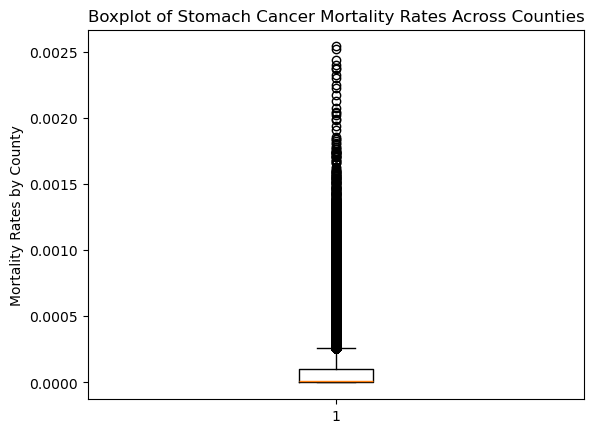

In [8]:
# create a boxplot using matplotlib of distribution of target
# can see the majority of values are 0 or near 0 with values going as high as .0025
plt.boxplot(df['TARGET_mortality_rate'])
plt.title('Boxplot of Stomach Cancer Mortality Rates Across Counties')
plt.ylabel('Mortality Rates by County')
plt.show()

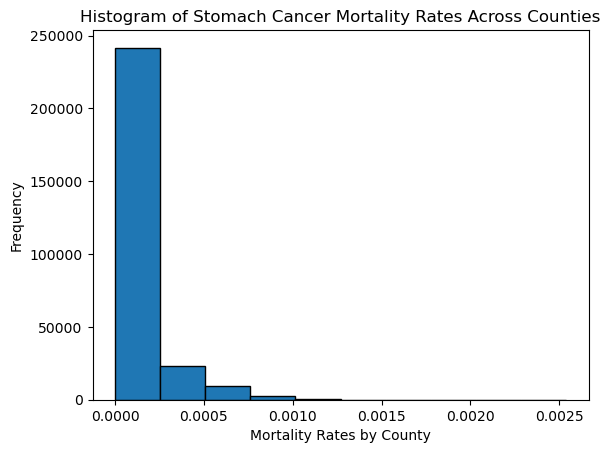

In [9]:
# also use a histogram to check values, just a different way of looking at the distribution
plt.hist(df['TARGET_mortality_rate'], bins=10, edgecolor='k')
plt.title('Histogram of Stomach Cancer Mortality Rates Across Counties')
plt.xlabel('Mortality Rates by County')
plt.ylabel('Frequency')
plt.show()

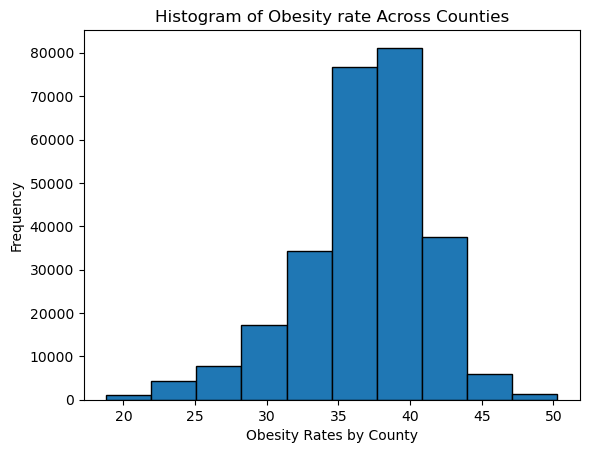

In [42]:
# check outliers in some of our features
plt.hist(df['Obesity'], bins=10, edgecolor='k')
plt.title('Histogram of Obesity rate Across Counties')
plt.xlabel('Obesity Rates by County')
plt.ylabel('Frequency')
plt.show()

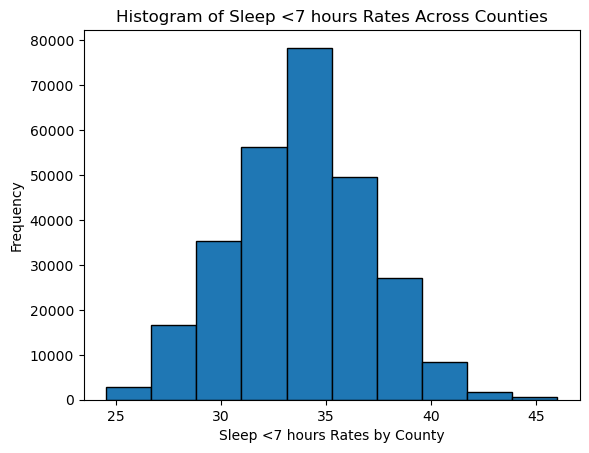

In [43]:
plt.hist(df['Sleep <7 hours'], bins=10, edgecolor='k')
plt.title('Histogram of Sleep <7 hours Rates Across Counties')
plt.xlabel('Sleep <7 hours Rates by County')
plt.ylabel('Frequency')
plt.show()

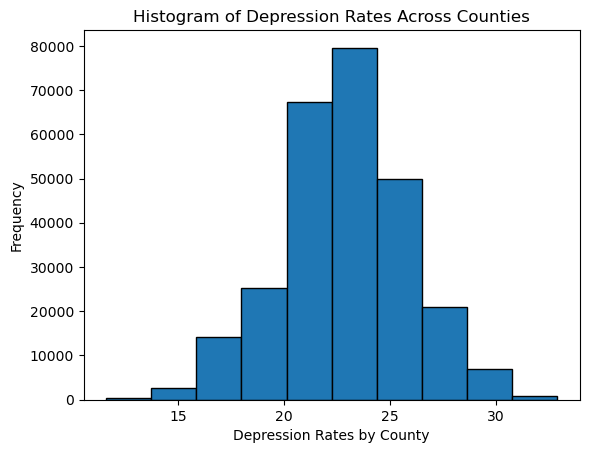

In [44]:
plt.hist(df['Depression'], bins=10, edgecolor='k')
plt.title('Histogram of Depression Rates Across Counties')
plt.xlabel('Depression Rates by County')
plt.ylabel('Frequency')
plt.show()

### Multivariate Non-Graphical and Graphical Analysis

In [29]:
# use a correlation matrix to check the correlation of target and a few other fields
# this can tell us if there is a relationship between certain features
#correlation_matrix = df[['TARGET_mortality_rate','sex__Male','age_category','Obesity','High Cholesterol','Binge Drinking','Depression','Sleep <7 hours']].corr()

correlation_matrix = df[['TARGET_mortality_rate','age_category','Obesity','High Cholesterol','Sleep <7 hours']].corr()
correlation_matrix

,TARGET_mortality_rate,age_category,Obesity,High Cholesterol,Sleep <7 hours
TARGET_mortality_rate,1.000000,6.871581e-01,1.473754e-02,-9.898467e-04,3.850956e-02
age_category,0.687158,1.000000e+00,9.678568e-16,-1.516734e-15,1.028452e-15
Obesity,0.014738,9.678568e-16,1.000000e+00,4.780113e-01,5.818803e-01
High Cholesterol,-0.000990,-1.516734e-15,4.780113e-01,1.000000e+00,3.005593e-01
Sleep <7 hours,0.038510,1.028452e-15,5.818803e-01,3.005593e-01,1.000000e+00


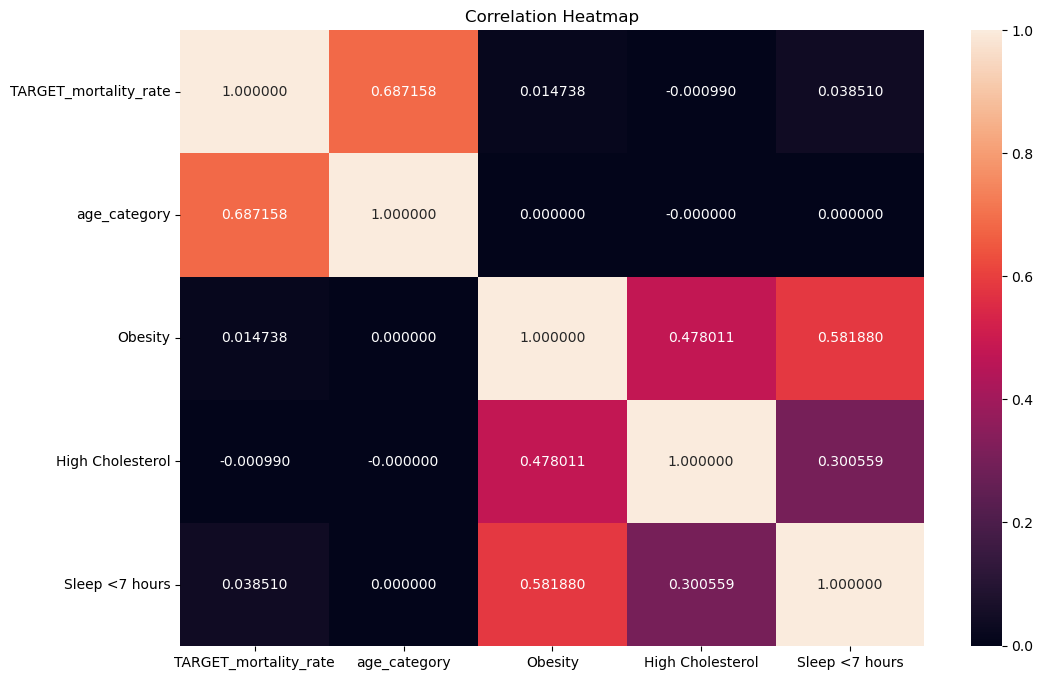

In [31]:
# use seaborn for correlation heatmap, can be easier for us to see any patterns
# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust the width and height so it's larger
sns.heatmap(correlation_matrix, annot=True, fmt='.6f')
plt.title('Correlation Heatmap')
plt.show()

# There seems to be a strong positive correlation with Age as well as Sex compared to selected other fields

## Check distribution of other fields from feature table

In [12]:
# Let's take a look at some other important fields from out target dataset
df[['race__API', 'race__Black', 'race__Latino', 'race__White', 'sex__Male', 'age_category']].head()

,race__API,race__Black,race__Latino,race__White,sex__Male,age_category
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


In [13]:
# Temporarily adding in 'American indian' as a race column based on of all the other 4 races are 0
# This was an option in the original dataset, but when we one-hot encoded, we dropped the first col to minimize
    # multicollinearity. Adding it back in now just for EDA
df['race__AIAN'] = ((df['race__API'] == 0) & 
                     (df['race__Black'] == 0) & 
                     (df['race__Latino'] == 0) & 
                     (df['race__White'] == 0)).astype(int)

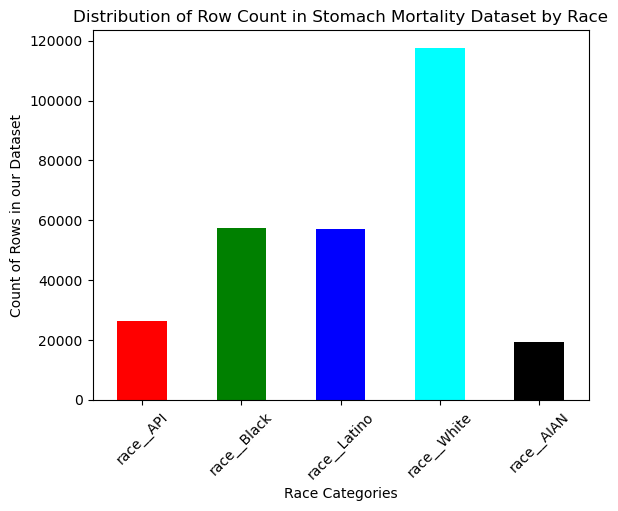

In [14]:
# Check the availability of data by race using a barchart

# get the 5 race fields
race_columns = ['race__API', 'race__Black', 'race__Latino', 'race__White', 'race__AIAN']

# sum the values in each race field to get the total counts for each race
race_counts = df[race_columns].sum()

# create a bar chart for the races to compare distribution of our dataset
race_counts.plot(kind='bar', color=['red', 'green', 'blue', 'cyan', 'black'])
plt.title('Distribution of Row Count in Stomach Mortality Dataset by Race')
plt.xlabel('Race Categories')
plt.ylabel('Count of Rows in our Dataset')
plt.xticks(rotation=45)  # rotate the category labels for better readability
plt.show()

# we can see majority of data rows are for white populations, 
    # followed by latino and black, then asians and finally, american indians
    # Certain counties may not have had enough diversity to report vals for each race category.

In [15]:
# drop the AIAN field again to decrease multicollinearity
df = df.drop(columns=['race__AIAN'])

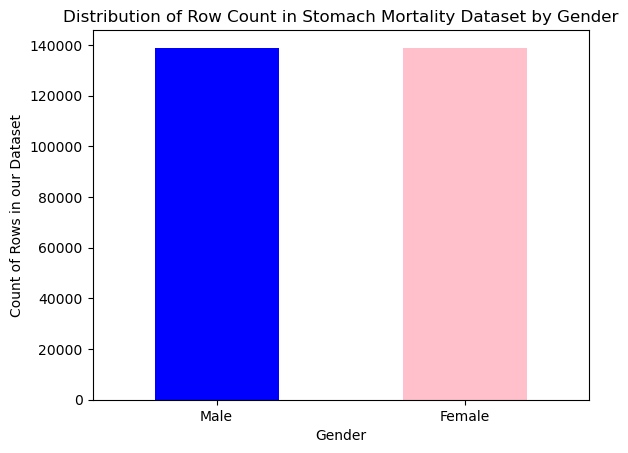

In [16]:
# Check the availability of data by gender using a barchart

# get male and female counts
gender_counts = df['sex__Male'].value_counts()

# if 'sex__Male' only includes '1' then Male, else Female
gender_counts.index = ['Male', 'Female']

# create a bar chart for gender
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Row Count in Stomach Mortality Dataset by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Rows in our Dataset')
plt.xticks(rotation=0)
plt.show()

# we can see it rows are equally distributed in our dataset

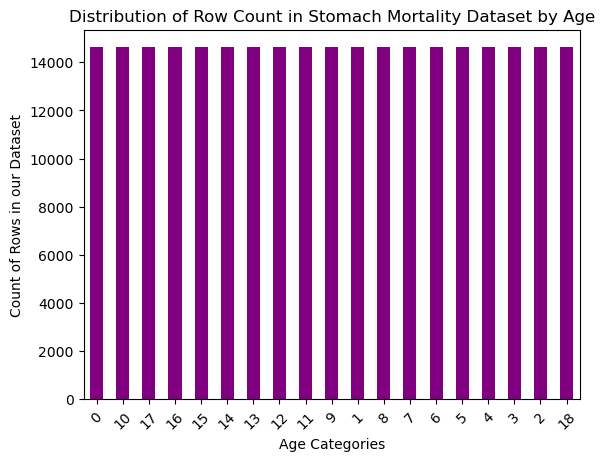

In [17]:
# Check the availability of data by age using a barchart

# count the values in each age category
age_category_counts = df['age_category'].value_counts()

# create a bar chart for age categories
age_category_counts.plot(kind='bar', color='purple')
plt.title('Distribution of Row Count in Stomach Mortality Dataset by Age')
plt.xlabel('Age Categories')
plt.ylabel('Count of Rows in our Dataset')
plt.xticks(rotation=45)
plt.show()

# we can see that age rows are also equally distributed across the categories

## Check counties with high rates of select illnesses (target or features)

In [18]:
# Function to split text at the second space to handle long x-axis labels for below graphs
def split_label(label):
    parts = label.split(' ')
    if len(parts) > 2:
        return ' '.join(parts[:2]) + '\n' + ' '.join(parts[2:])
    else:
        return label

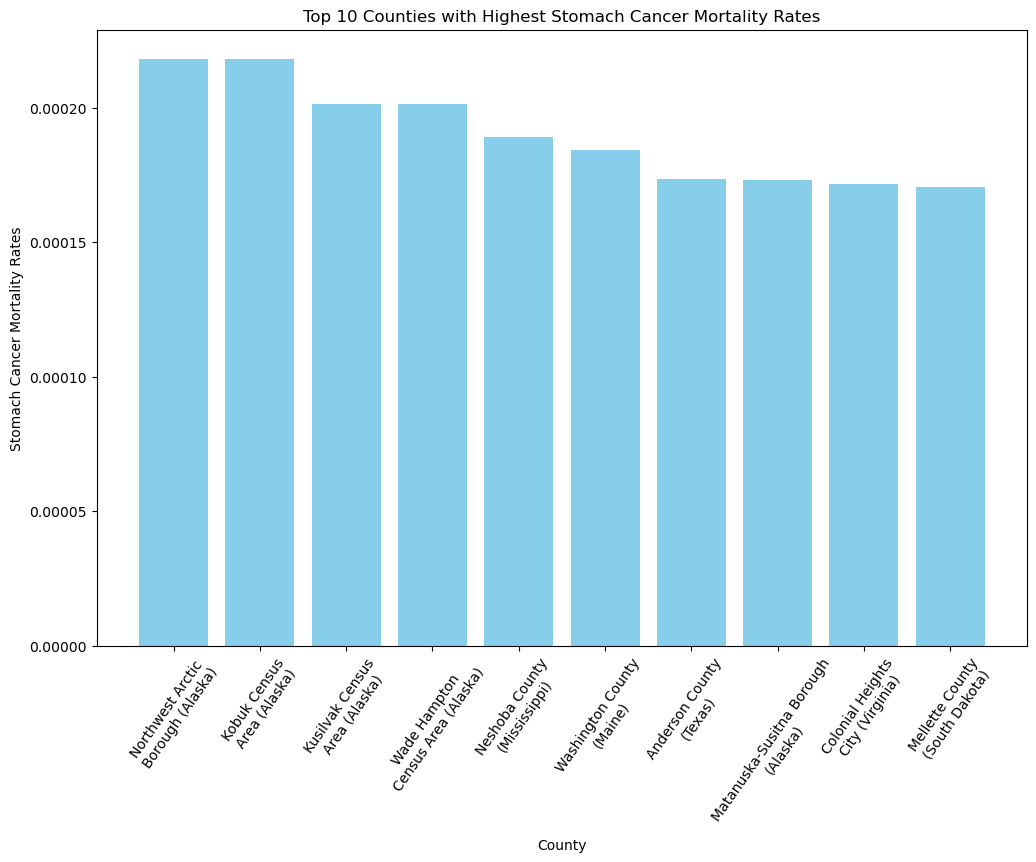

In [19]:
# let's see which counties have the highest avg stomach cancer rate

# group by 'location_name' and get the mean 'TARGET_mortality_rate' for each county
grouped = df.groupby('location_name')['TARGET_mortality_rate'].mean().reset_index()

# sort the df based on 'TARGET_mortality_rate' in descending order and get the top 10
top_10 = grouped.sort_values(by='TARGET_mortality_rate', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_10['location_name'].astype(str), top_10['TARGET_mortality_rate'], color='skyblue')
plt.title('Top 10 Counties with Highest Stomach Cancer Mortality Rates')
plt.xlabel('County')
plt.ylabel('Stomach Cancer Mortality Rates')

# Apply the splitting function to x-tick labels
wrapped_labels = [split_label(label) for label in top_10['location_name']]
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=55)  

plt.show()

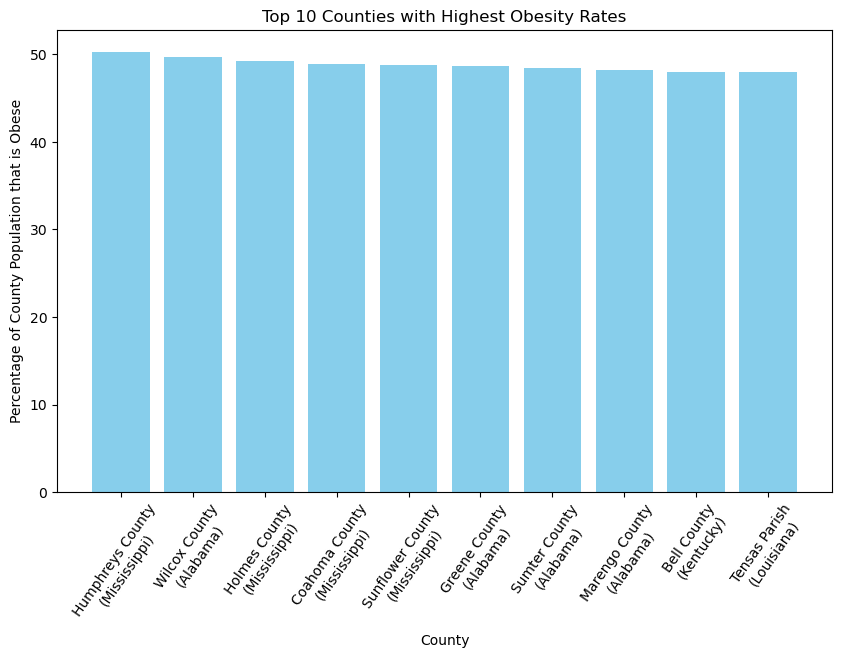

In [20]:
# let's see which counties have the avg highest obesity rates (as per CDC health metrics)

# group by 'location_name' and get the mean 'obesity' for each county
grouped = df.groupby('location_name')['Obesity'].mean().reset_index()

# sort the df based on 'Obesity' in descending order and get the top 10
top_10 = grouped.sort_values(by='Obesity', ascending=False).head(10)

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10['location_name'].astype(str), top_10['Obesity'], color='skyblue')
plt.title('Top 10 Counties with Highest Obesity Rates')
plt.xlabel('County')
plt.ylabel('Percentage of County Population that is Obese')

# Apply the splitting function to x-tick labels
wrapped_labels = [split_label(label) for label in top_10['location_name']]
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=55)  

plt.show()

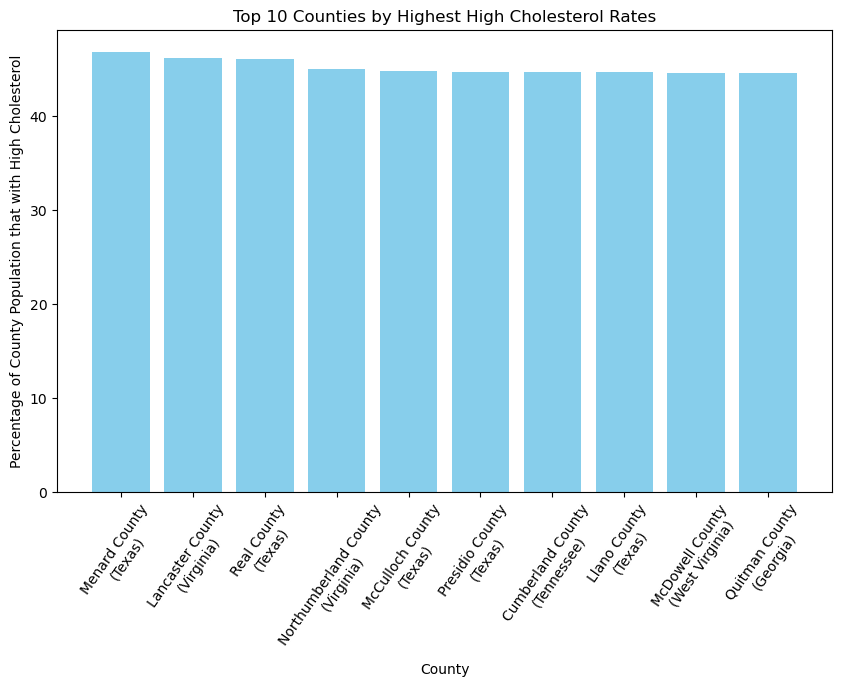

In [21]:
# let's see which counties have the highest high cholesterol rates

# group by 'location_name' and get the mean 'High Cholesterol' for each county
grouped = df.groupby('location_name')['High Cholesterol'].mean().reset_index()

# sort the df based on 'High Cholesterol' in descending order and get the top 10
top_10 = grouped.sort_values(by='High Cholesterol', ascending=False).head(10)

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10['location_name'].astype(str), top_10['High Cholesterol'], color='skyblue')
plt.title('Top 10 Counties by Highest High Cholesterol Rates')
plt.xlabel('County')
plt.ylabel('Percentage of County Population that with High Cholesterol')

# Apply the splitting function to x-tick labels
wrapped_labels = [split_label(label) for label in top_10['location_name']]
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=55)  

plt.show()

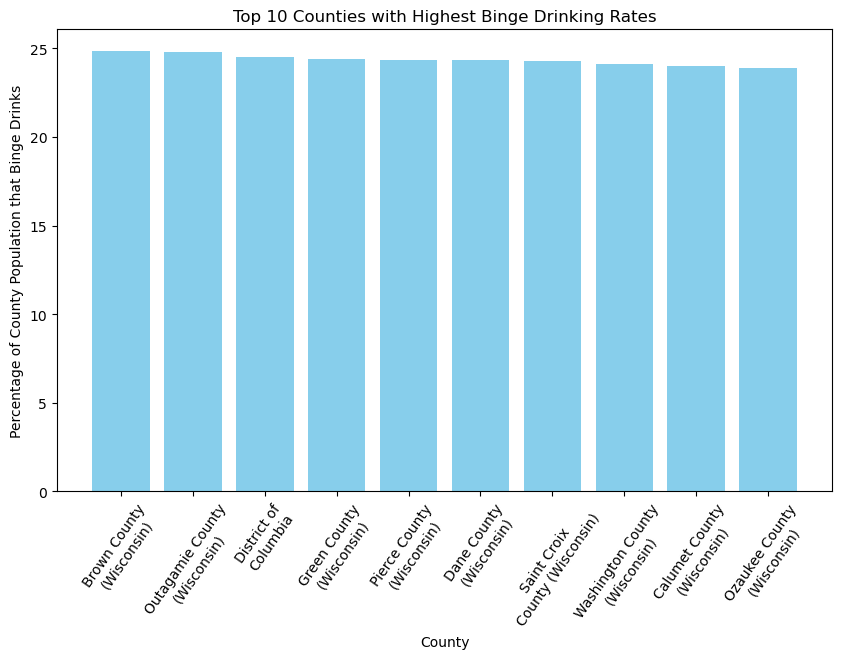

In [22]:
# let's see which counties have the highest Binge Drinking rates

# group by 'location_name' and get the mean 'Binge Drinking' for each county
grouped = df.groupby('location_name')['Binge Drinking'].mean().reset_index()

# sort the df based on 'Binge Drinking' in descending order and get the top 10
top_10 = grouped.sort_values(by='Binge Drinking', ascending=False).head(10)

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10['location_name'].astype(str), top_10['Binge Drinking'], color='skyblue')
plt.title('Top 10 Counties with Highest Binge Drinking Rates')
plt.xlabel('County')
plt.ylabel('Percentage of County Population that Binge Drinks')

# Apply the splitting function to x-tick labels
wrapped_labels = [split_label(label) for label in top_10['location_name']]
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=55)  

plt.show()

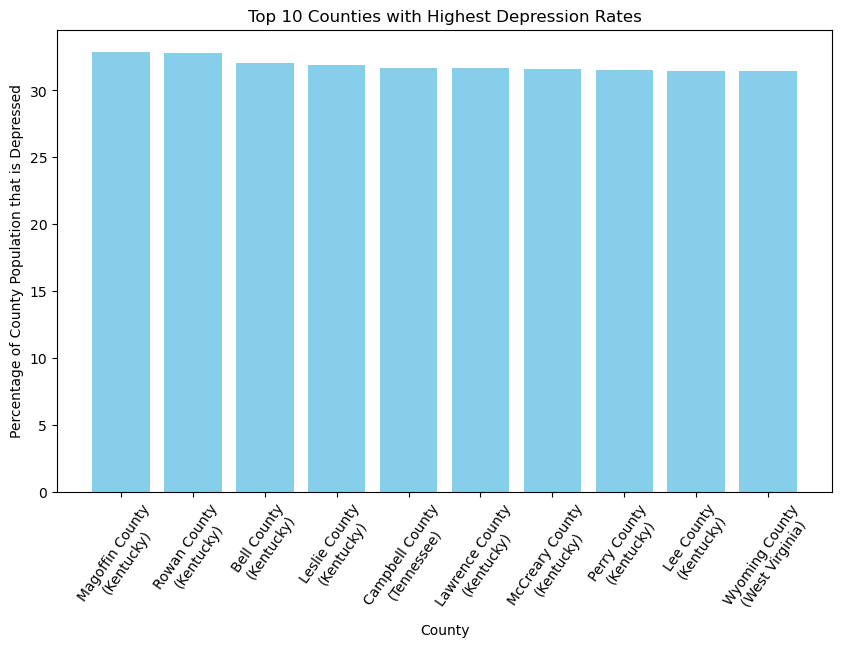

In [23]:
# let's see which counties have the highest Depression rates

# group by 'county' and get the mean 'Depression' for each county
grouped = df.groupby('location_name')['Depression'].mean().reset_index()

# sort the df based on 'Depression' in descending order and get the top 10
top_10 = grouped.sort_values(by='Depression', ascending=False).head(10)

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10['location_name'].astype(str), top_10['Depression'], color='skyblue')
plt.title('Top 10 Counties with Highest Depression Rates')
plt.xlabel('County')
plt.ylabel('Percentage of County Population that is Depressed')

# Apply the splitting function to x-tick labels
wrapped_labels = [split_label(label) for label in top_10['location_name']]
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=55)  

plt.show()

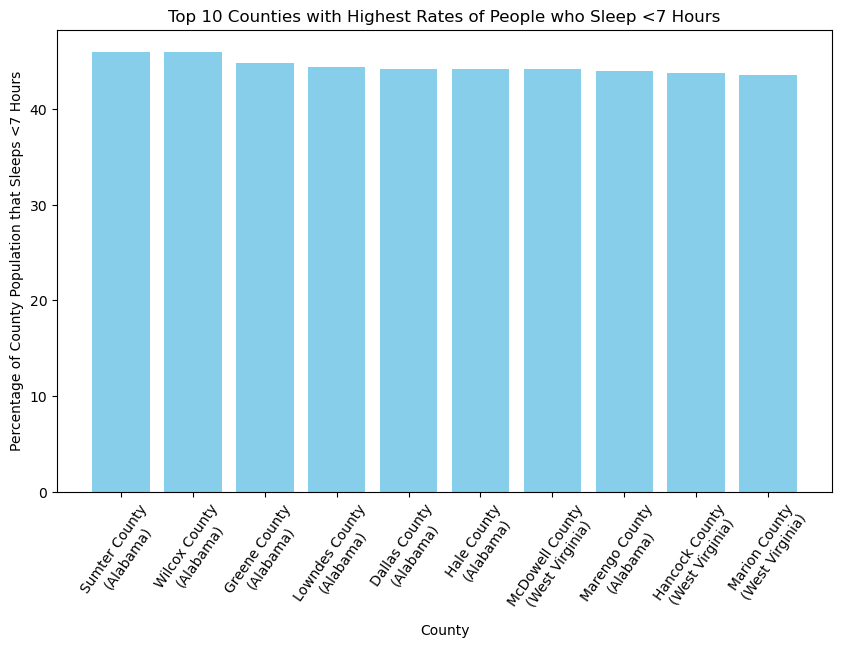

In [24]:
# let's see which counties have the highest avg Sleep <7 hours

# group by 'county' and get the mean 'Sleep <7 hours' for each county
grouped = df.groupby('location_name')['Sleep <7 hours'].mean().reset_index()

# sort the df based on 'Sleep <7 hours' in descending order and get the top 10
top_10 = grouped.sort_values(by='Sleep <7 hours', ascending=False).head(10)

# create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10['location_name'].astype(str), top_10['Sleep <7 hours'], color='skyblue')
plt.title('Top 10 Counties with Highest Rates of People who Sleep <7 Hours')
plt.xlabel('County')
plt.ylabel('Percentage of County Population that Sleeps <7 Hours')

# Apply the splitting function to x-tick labels
wrapped_labels = [split_label(label) for label in top_10['location_name']]
plt.xticks(ticks=range(len(wrapped_labels)), labels=wrapped_labels, rotation=55)  

plt.show()